## MRI Data Preprocessing Pipeline Definition
1. Image Resizing
2. Intensity Normalization

#### 1. Image Resizing <br>
❌ 180 * 180: Will lose important details <br>
❌ 200 * 190: Non-uniform size <br>
✅ 224 * 224: Standard size for CNNs <br>
All MRI images were resized to a fixed resolution of 224×224 pixels to ensure consistent input dimensions for convolutional neural networks and compatibility with common deep learning architectures.

#### 2. Intensity Normalization <br>
❌standardize: Not suitable for MRI, RGB values from 0-255 <br>
✅min-max scaling: Scale pixel values to [0, 1] <br>
All MRI images underwent intensity normalization using min-max scaling to rescale pixel values to a range of [0, 1], enhancing contrast and improving model performance.

#### Step 1: Define Preprocessing Functions

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def image_preprocess(
        file_path,
        target_size=(224, 224),
        normalize=True
):
    """
    Load an image, resize it, and normalize pixel values.
    :param file_path:
    :param target_size:
    :param normalize:
    :return: Preprocessed image as a NumPy array, for RGB images is (h, w, channels)
    """
    # Load image as RGB
    img = Image.open(file_path).convert('RGB')
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize image
    img = img.resize(target_size)

    # Convert to ndarray
    img_array = np.array(img, dtype=np.float32)

    # Normalize pixel values to [0, 1]
    if normalize:
        img_array /= 255.0

    return img_array

#### Step 2: Apply Preprocessing to a Sample Image

In [2]:
import pandas as pd
df = pd.read_csv('mri_data_distribution.csv')

sample_image_path = df.sample(1, random_state=42).iloc[0]['file_path']
sample_preprocessed = image_preprocess(sample_image_path)

print("Size of preprocessed image:", sample_preprocessed.shape)
print("Max pixel value:", np.max(sample_preprocessed))
print("Min pixel value:", np.min(sample_preprocessed))

Size of preprocessed image: (224, 224, 3)
Max pixel value: 1.0
Min pixel value: 0.0


#### Step 3: Visualize Original vs Preprocessed Image

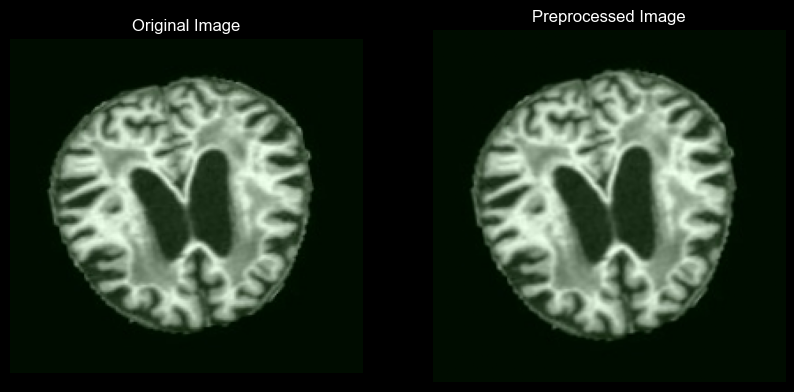

In [3]:
original_img = Image.open(sample_image_path).convert('RGB')
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(original_img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(sample_preprocessed)
ax[1].set_title('Preprocessed Image')
ax[1].axis('off')
plt.show()
